<a href="https://colab.research.google.com/github/kwanto2023/RECO7093_data/blob/main/RECO7093_Example_for_class_demonstration_Classroom_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# First Example


*Housing Prices and Distance From an Incinerator*

*A new incinerator would be built in North Andover, Massachusetts in 1981*


---

  1. year:                     1978, 1981
  2. age:                      age of house
  3. agesq:                   age^2
  4. nbh:                      neighborhood, 1 to 6
  5. cbd:                    dist. to central bus. dstrct, feet
  6. inst:                     dist. to interstate, feet
  7. linst:                   log(inst)
  8. price:                   selling price
  9. rooms:                   number of rooms in house
  10. area:                   square footage of house
  11. land:                     square footage lot
  12. baths:                    # bathrooms
  13. dist:                     dist. from house to incin., feet

In [ ]:
#path="https://github.com/kwanto2023/RECO7093_data/blob/main/hprice3.xlsx?raw=true"
path="https://github.com/kwanto2023/RECO7093_data/blob/main/hprice3.dta?raw=true"
df=pd.read_stata(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 320
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     321 non-null    int16  
 1   age      321 non-null    int16  
 2   agesq    321 non-null    float32
 3   nbh      321 non-null    int8   
 4   cbd      321 non-null    float32
 5   inst     321 non-null    float32
 6   linst    321 non-null    float32
 7   price    321 non-null    float32
 8   rooms    321 non-null    int8   
 9   area     321 non-null    int16  
 10  land     321 non-null    float32
 11  baths    321 non-null    int8   
 12  dist     321 non-null    float32
 13  ldist    321 non-null    float32
 14  lprice   321 non-null    float32
 15  y81      321 non-null    int8   
 16  larea    321 non-null    float32
 17  lland    321 non-null    float32
 18  linstsq  321 non-null    float32
dtypes: float32(12), int16(3), int8(4)
memory usage: 20.7 KB


In [ ]:
df.head()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
0,1978,48,2304.0,4,3000.0,1000.0,6.9078,60000.0,7,1660,4578.0,1,10700.0,9.277999,11.002100,0,7.414573,8.429017,47.717705
1,1978,83,6889.0,4,4000.0,1000.0,6.9078,40000.0,6,2612,8370.0,2,11000.0,9.305651,10.596635,0,7.867871,9.032409,47.717705
2,1978,58,3364.0,4,4000.0,1000.0,6.9078,34000.0,6,1144,5000.0,1,11500.0,9.350102,10.434115,0,7.042286,8.517193,47.717705
3,1978,11,121.0,4,4000.0,1000.0,6.9078,63900.0,5,1136,10000.0,1,11900.0,9.384294,11.065075,0,7.035269,9.210340,47.717705
4,1978,48,2304.0,4,4000.0,2000.0,7.6009,44000.0,5,1868,10000.0,1,12100.0,9.400961,10.691945,0,7.532624,9.210340,57.773682


In [ ]:
df.describe()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.567017,2.208723,15822.429688,16442.367188,9.480514,96100.664062,6.585670,2106.728972,39629.890625,2.339564,20715.576172,9.837415,11.378118,0.442368,7.597233,10.301859,90.482246
std,1.492329,32.565845,4801.789062,2.164353,8967.106445,9033.130859,0.777165,43223.730469,0.901204,694.957902,39514.390625,0.770526,8508.183594,0.478383,0.438174,0.497443,0.340723,0.801752,14.066464
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,1710.000000,1.000000,5000.000000,8.517193,10.165852,0.000000,6.599871,7.444249,47.717705
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.105000,65000.000000,6.000000,1560.000000,16935.000000,2.000000,13400.000000,9.503010,11.082143,0.000000,7.352441,9.737138,82.901016
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,43560.000000,2.000000,19900.000000,9.898475,11.360939,0.000000,7.628518,10.681894,93.708206
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,46100.000000,3.000000,27200.000000,10.210970,11.695247,1.000000,7.841493,10.738568,101.727402
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,544500.000000,4.000000,40000.000000,10.596630,12.611538,1.000000,8.544030,13.207623,108.868355


In [ ]:
df.shape

(321, 19)

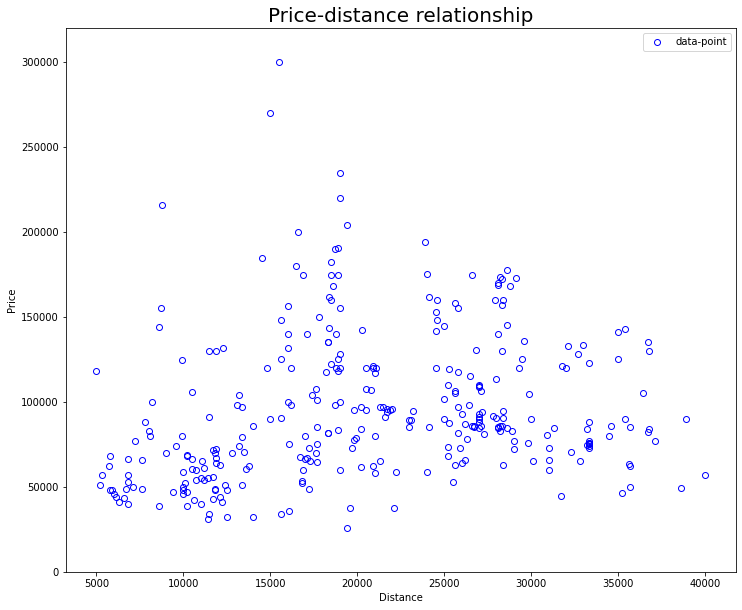

In [ ]:
%matplotlib inline
width=12
height=10
plt.figure(figsize=(width, height))

y=df['price']
x=df['dist']

plt.plot(x, y, 'bo', mfc='none', label='data-point')
plt.ylim([0, 320000])
plt.ylabel('Price')
plt.xlabel('Distance')
plt.title('Price-distance relationship', fontsize=20)
plt.legend()

plt.show()

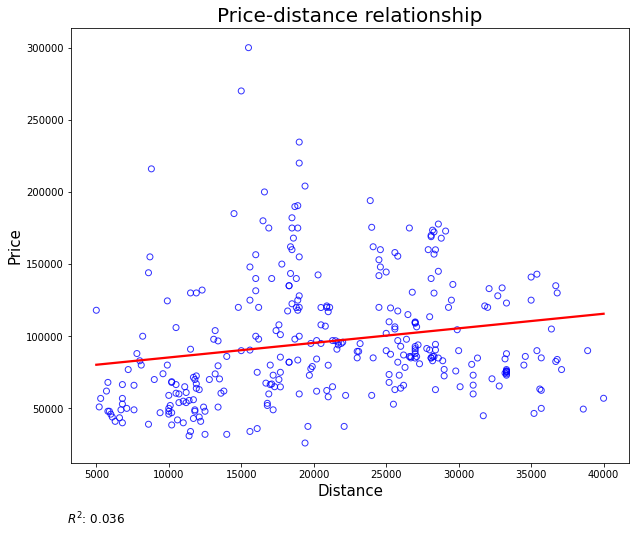

In [ ]:
plt.figure(figsize=(10,8))

from statsmodels.formula.api import ols

model=ols('price~dist', data=df).fit()

ax=sns.regplot(x="dist", y="price", marker="o", ci=False, data=df,
           scatter_kws={'facecolors':'none', 'edgecolor':'b'},
           line_kws={"color":'r'})

ax.set_xlabel('Distance', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title("Price-distance relationship", fontsize=20)
ax.text(3000, -30000, r'$R^2$: {}'.format(round(model.rsquared_adj,3)), fontsize=12)
plt.savefig('price_dist_hprice3.png', bbox_inches="tight")

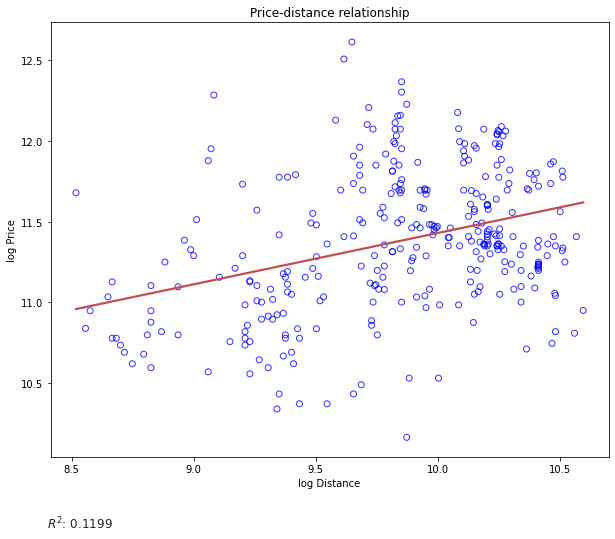

In [ ]:
plt.figure(figsize=(10,8))

model1=ols('lprice~ldist', data=df).fit()
#print(model1.rsquared_adj)

ax=sns.regplot(x="ldist", y="lprice", marker="o", ci=False, data=df, dropna=True,
           scatter_kws={'facecolors':'none', 'edgecolor':'b'},
           line_kws={"color":'r'})

ax.set(xlabel='log Distance', ylabel='log Price', title="Price-distance relationship")
sns.set(font_scale=1)   
ax.text(8.4, 9.6, r'$R^2$: {}'.format(round(model1.rsquared,4)), fontsize=12)
plt.savefig('lprice_ldist_hprice3.png', bbox_inches="tight")

In [ ]:
model1.params

Intercept    8.257501
ldist        0.317219
dtype: float64

In [ ]:
model1.tvalues

Intercept    17.427104
ldist         6.593688
dtype: float64

In [ ]:
model1

In [ ]:
result=model1.summary()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     43.48
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.78e-10
Time:                        02:25:51   Log-Likelihood:                -169.60
No. Observations:                 321   AIC:                             343.2
Df Residuals:                     319   BIC:                             350.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2575      0.474     17.427      0.0

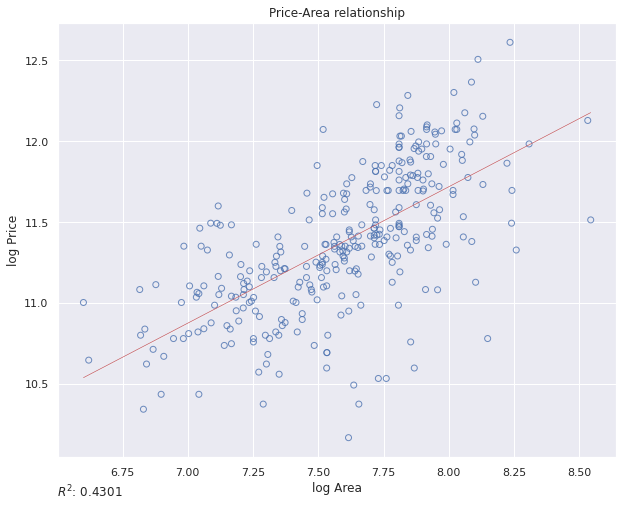

In [ ]:
model3=ols('lprice~larea', data=df).fit()

plt.figure(figsize=(10,8))

ax=sns.regplot(x="larea", y="lprice", marker="o", ci=False, data=df,
           scatter_kws={'facecolors':'none', 'edgecolor':'b'},
           line_kws={"color":'r', 'lw':'0.6'})
ax.set(xlabel='log Area', ylabel='log Price', title="Price-Area relationship")

ax.text(6.5, 9.8, r'$R^2$: {}'.format(round(model3.rsquared,4)))
plt.savefig('lprice_larea_hprice3.png', bbox_inches='tight')

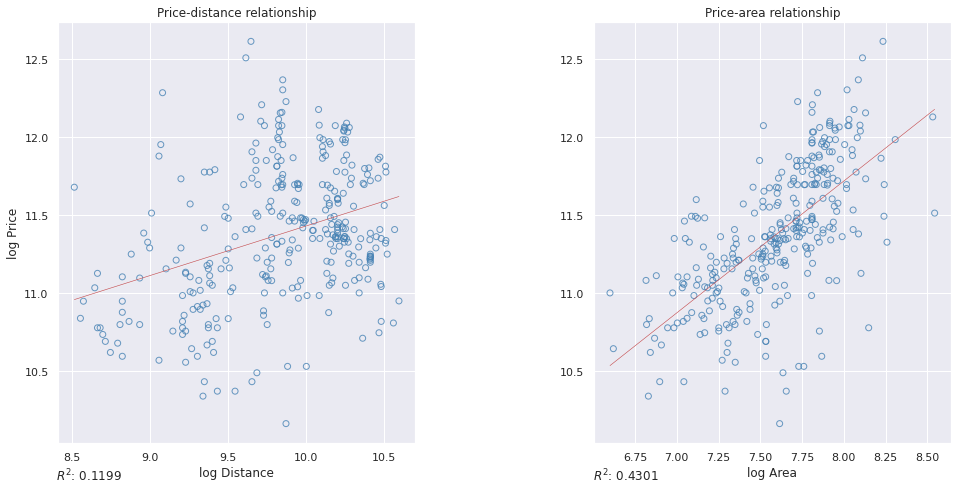

In [ ]:
model1=ols('lprice~ldist', data=df).fit()

plt.figure(figsize=(16,8))

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
ax1=sns.regplot(x="ldist", y="lprice", marker="o", ci=False, data=df,
           scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
           line_kws={"color":'r', 'lw':'0.6'})
ax1.set(xlabel='log Distance', ylabel='log Price', title="Price-distance relationship")
ax1.text(8.4, 9.8, r'$R^2$: {}'.format(round(model1.rsquared,4)))


model3=ols('lprice~larea', data=df).fit()

plt.subplot(1,2,2)
ax2=sns.regplot(x="larea", y="lprice", marker="o", ci=False, data=df,
           scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
           line_kws={"color":'r', 'lw':'0.6'})
ax2.set(xlabel='log Area', ylabel='', title="Price-area relationship")
ax2.text(6.5, 9.8, r'$R^2$: {}'.format(round(model3.rsquared,4)))

plt.savefig('lprice_combined_hprice3.png')
plt.show()

In [ ]:
df['nearinc']=np.where(df['dist']<=15840, 1,0)

In [ ]:
df.describe()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq,nearinc
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.567017,2.208723,15822.429688,16442.367188,9.480514,96100.664062,6.585670,2106.728972,39629.890625,2.339564,20715.576172,9.837415,11.378118,0.442368,7.597233,10.301859,90.482246,0.299065
std,1.492329,32.565845,4801.789062,2.164353,8967.106445,9033.130859,0.777165,43223.730469,0.901204,694.957902,39514.390625,0.770526,8508.183594,0.478383,0.438174,0.497443,0.340723,0.801752,14.066464,0.458563
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,1710.000000,1.000000,5000.000000,8.517193,10.165852,0.000000,6.599871,7.444249,47.717705,0.000000
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.105000,65000.000000,6.000000,1560.000000,16935.000000,2.000000,13400.000000,9.503010,11.082143,0.000000,7.352441,9.737138,82.901016,0.000000
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,43560.000000,2.000000,19900.000000,9.898475,11.360939,0.000000,7.628518,10.681894,93.708206,0.000000
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,46100.000000,3.000000,27200.000000,10.210970,11.695247,1.000000,7.841493,10.738568,101.727402,1.000000
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,544500.000000,4.000000,40000.000000,10.596630,12.611538,1.000000,8.544030,13.207623,108.868355,1.000000


In [ ]:
model=ols('price~nearinc', data=df[df['y81']==1]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     27.73
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           5.14e-07
Time:                        02:26:17   Log-Likelihood:                -1707.6
No. Observations:                 142   AIC:                             3419.
Df Residuals:                     140   BIC:                             3425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.319e+05   4027.121     32.754      0.0

In [ ]:
model.params

Intercept    131902.382353
nearinc      -39956.132353
dtype: float64

In [ ]:
print(model.summary2(float_format='%.4f', alpha=0.05))

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.159     
Dependent Variable:  price             AIC:                 3419.1396 
Date:                2023-01-11 02:26  BIC:                 3425.0513 
No. Observations:    142               Log-Likelihood:      -1707.6   
Df Model:            1                 F-statistic:         27.73     
Df Residuals:        140               Prob (F-statistic):  5.14e-07  
R-squared:           0.165             Scale:               1.6542e+09
----------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------
Intercept 131902.3824 4027.1207 32.7535 0.0000 123940.5483 139864.2164
nearinc   -39956.1324 7587.6769 -5.2659 0.0000 -54957.3771 -24954.8876
----------------------------------------------------------------------
Omnibus:               23.

In [ ]:
model=ols('price~nearinc', data=df[df['y81']==0]).fit()
print(model.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.076     
Dependent Variable:   price            AIC:                4193.7301 
Date:                 2023-01-11 02:26 BIC:                4200.1049 
No. Observations:     179              Log-Likelihood:     -2094.9   
Df Model:             1                F-statistic:        15.74     
Df Residuals:         177              Prob (F-statistic): 0.000105  
R-squared:            0.082            Scale:              8.6624e+08
---------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
---------------------------------------------------------------------
Intercept  82517.2276 2653.7900 31.0941 0.0000  77280.0867 87754.3686
nearinc   -18824.3705 4744.5940 -3.9675 0.0001 -28187.6236 -9461.1174
---------------------------------------------------------------------
Omnibus:               173.455       Du

In [ ]:
model=ols('price~C(nearinc)', data=df[df['y81']==0]).fit()
print(model.summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.076     
Dependent Variable:     price              AIC:                  4193.7301 
Date:                   2023-01-11 02:26   BIC:                  4200.1049 
No. Observations:       179                Log-Likelihood:       -2094.9   
Df Model:               1                  F-statistic:          15.74     
Df Residuals:           177                Prob (F-statistic):   0.000105  
R-squared:              0.082              Scale:                8.6624e+08
---------------------------------------------------------------------------
                   Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
---------------------------------------------------------------------------
Intercept        82517.2276 2653.7900 31.0941 0.0000  77280.0867 87754.3686
C(nearinc)[T.1] -18824.3705 4744.5940 -3.9675 0.0001 -28187.6236 -9461.1174
----------------------------------

In [ ]:
model=ols('price~C(nearinc)-1', data=df[df['y81']==0]).fit()
print(model.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.076     
Dependent Variable:   price             AIC:                 4193.7301 
Date:                 2023-01-11 02:26  BIC:                 4200.1049 
No. Observations:     179               Log-Likelihood:      -2094.9   
Df Model:             1                 F-statistic:         15.74     
Df Residuals:         177               Prob (F-statistic):  0.000105  
R-squared:            0.082             Scale:               8.6624e+08
-----------------------------------------------------------------------
                Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
C(nearinc)[0] 82517.2276 2653.7900 31.0941 0.0000 77280.0867 87754.3686
C(nearinc)[1] 63692.8571 3933.0104 16.1944 0.0000 55931.2295 71454.4848
-----------------------------------------------------------------------
Omnibus:    

In [ ]:
model=ols('price~C(nearinc)*y81', data=df).fit()
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.350     
Dependent Variable:     price                AIC:                    7629.4130 
Date:                   2023-01-11 02:26     BIC:                    7644.4988 
No. Observations:       321                  Log-Likelihood:         -3810.7   
Df Model:               3                    F-statistic:            58.46     
Df Residuals:           317                  Prob (F-statistic):     4.18e-30  
R-squared:              0.356                Scale:                  1.2142e+09
-------------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------------
Intercept            82517.2276 3141.9498 26.2631 0.0000  76335.5179 88698.9374
C(nearinc)[T.1]     -18824.3705 5617.3534 -3.3511 0.0009 -29876.

In [ ]:
model=ols('price~C(nearinc)+y81+C(nearinc):y81', data=df).fit()
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.350     
Dependent Variable:     price                AIC:                    7629.4130 
Date:                   2023-01-11 02:26     BIC:                    7644.4988 
No. Observations:       321                  Log-Likelihood:         -3810.7   
Df Model:               3                    F-statistic:            58.46     
Df Residuals:           317                  Prob (F-statistic):     4.18e-30  
R-squared:              0.356                Scale:                  1.2142e+09
-------------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------------
Intercept            82517.2276 3141.9498 26.2631 0.0000  76335.5179 88698.9374
C(nearinc)[T.1]     -18824.3705 5617.3534 -3.3511 0.0009 -29876.

# Second Example - Confidence Interval and Prediction Interval

*Effects of Pollution on Housing Prices*

*A sample of 506 communities in the Boston area*


---


  1. price: median housing price, $

  2. crime:                    crimes committed per capita
  3. nox:                      nitrous oxide, parts per 100 mill.
  4. rooms:                    avg number of rooms per house
  5. dist:                     weighted dist. to 5 employ centers
  6. radial:                   accessibiliy index to radial highways
  7. proptax:                  property tax per $1000
  8. stratio:                  average student-teacher ratio
  9. lowstat:                  % of people 'lower status'

In [ ]:
path="https://github.com/kwanto2023/RECO7093_data/blob/main/hprice2.dta?raw=true"
df2=pd.read_stata(path)

In [ ]:
df2.shape

(506, 12)

In [ ]:
df2.describe()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22511.509766,3.611536,5.549782,6.284051,3.795751,9.549407,40.823715,18.459290,12.701483,9.941057,1.693091,5.931405
std,9208.856445,8.590247,1.158395,0.702594,2.106137,8.707259,16.853710,2.165820,7.238066,0.409255,0.201410,0.396367
min,5000.000000,0.006000,3.850000,3.560000,1.130000,1.000000,18.700001,12.600000,1.730000,8.517193,1.348073,5.231109
25%,16850.000000,0.082000,4.490000,5.882500,2.100000,4.000000,27.900000,17.400000,6.922500,9.732093,1.501853,5.631212
50%,21200.000000,0.256500,5.380000,6.210000,3.210000,5.000000,33.000000,19.100000,11.360000,9.961757,1.682688,5.799093
75%,24999.000000,3.677000,6.240000,6.620000,5.187500,24.000000,66.599998,20.200001,17.057500,10.126591,1.830980,6.501290
max,50001.000000,88.975998,8.710000,8.780000,12.130000,24.000000,71.099998,22.000000,39.070000,10.819798,2.164472,6.566672


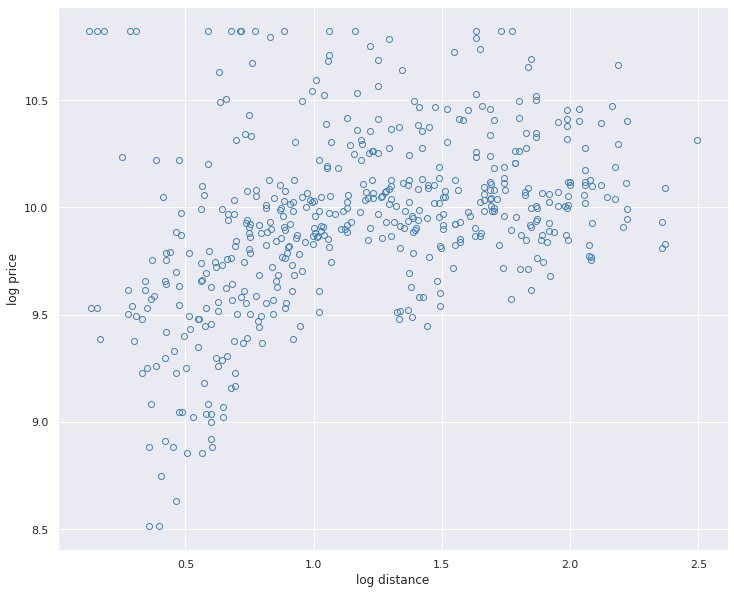

In [ ]:
width=12
height=10
plt.figure(figsize=(width, height))
df2['ldist']=np.log(df2['dist'])
x=df2['ldist']
y=df2['lprice']

plt.plot(x,y,"o", color="steelblue", mfc='none')
plt.xlabel("log distance")
plt.ylabel("log price")
plt.title("")
plt.show()


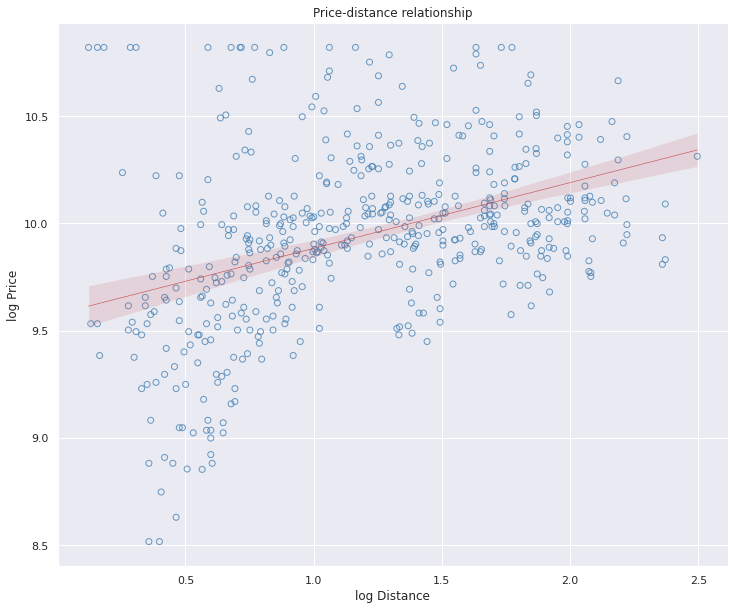

In [ ]:
model=ols('lprice~ldist', data=df2).fit()

plt.figure(figsize=(width, height))

ax=sns.regplot(x="ldist", y="lprice", marker="o", data=df2,
           scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
           line_kws={"color":'r', 'lw':'0.6'})
ax.set(xlabel='log Distance', ylabel='log Price', title="Price-distance relationship")
plt.savefig('lprice_ldist_hprice2.png')

In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2=summary_table(model, alpha=0.05)
fittedvalues=data[:,2]
predict_mean_se=data[:,3]
predict_mean_ci_low, predict_mean_ci_upp=data[:,4:6].T
predict_ci_low, predict_ci_upp=data[:,6:8].T

#check we got the right things
print(np.max(np.abs(model.fittedvalues-fittedvalues)))
#print(np.max(np.abs(iv_l-predict_ci_low)))
#print(np.max(np.abs(iv_u-predict_ci_upp)))
predict_mean_ci_upp.shape

0.0


(506,)

In [ ]:
import statsmodels.api as sm
x=df2['ldist']
x_mat=np.column_stack((np.ones(len(x)), x))
y=df2['lprice']

model=sm.OLS(y,x_mat).fit()
dt=model.get_prediction(x_mat).summary_frame(alpha=0.05)
y_prd=dt['mean']
y_prd_ci_lower=dt['obs_ci_lower']
y_prd_ci_upper=dt['obs_ci_upper']

y_m_ci_lower=dt['mean_ci_lower']
y_m_ci_upper=dt['mean_ci_upper']
print(pd.DataFrame(np.column_stack([y_prd, y_prd_ci_lower, y_prd_ci_upper, y_m_ci_lower, y_m_ci_upper])).head())

           0         1          2          3          4
0  10.008597  9.271549  10.745646   9.973240  10.043954
1  10.068339  9.330981  10.805697  10.027026  10.109652
2  10.068339  9.330981  10.805697  10.027026  10.109652
3  10.129128  9.391260  10.866996  10.079541  10.178715
4  10.129128  9.391260  10.866996  10.079541  10.178715


In [ ]:
#df.info()
model_m=ols('lprice~crime+rooms+ldist+nox', data=df2).fit()
print(model_m.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          7.31e-101
Time:                        02:27:54   Log-Likelihood:                -27.455
No. Observations:                 506   AIC:                             64.91
Df Residuals:                     501   BIC:                             86.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1246      0.188     48.616      0.0

In [ ]:
p=model_m.params
indep=p[1:]
indep

crime   -0.016869
rooms    0.286923
ldist   -0.153556
nox     -0.133922
dtype: float64

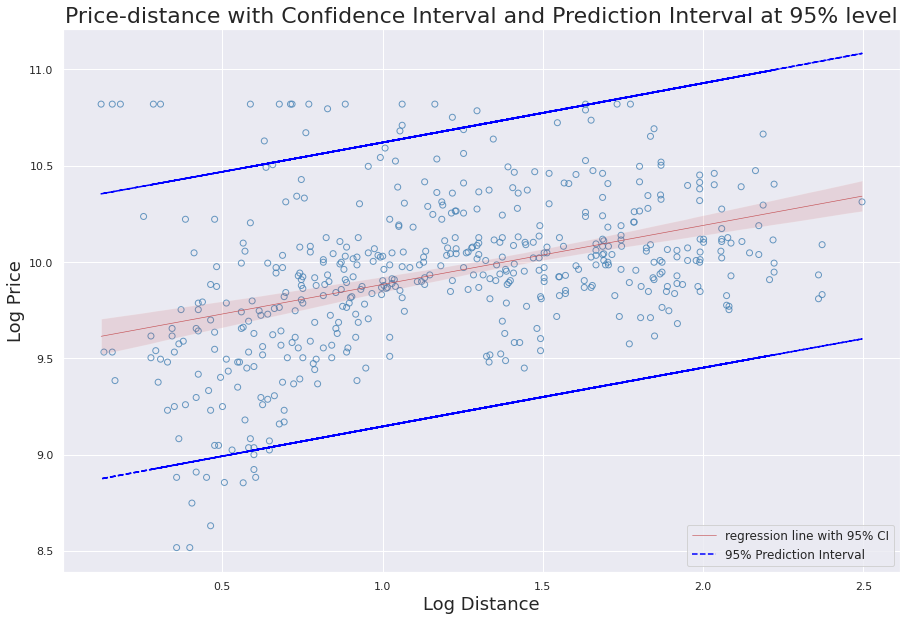

In [ ]:
plt.figure(num=1, figsize=(15,10))

ax=sns.regplot(x="ldist", y="lprice", marker="o", data=df2,
           scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
           line_kws={"color":'r', 'lw':'0.6', 'label':'regression line with 95% CI'})
#ax.set(xlabel='log Distance', ylabel='log Price', title="Price-distance with 95% Confidence Interval")
ax.set_xlabel("Log Distance", fontsize=18)
ax.set_ylabel("Log Price", fontsize=18)
ax.set_title("Price-distance with Confidence Interval and Prediction Interval at 95% level", fontsize=22)
plt.plot(x, y_prd_ci_lower, color="blue", linestyle="--", label="95% Prediction Interval")
plt.plot(x, y_prd_ci_upper, color="blue", linestyle="--")

plt.legend(loc='lower right', fontsize=12)
plt.show()

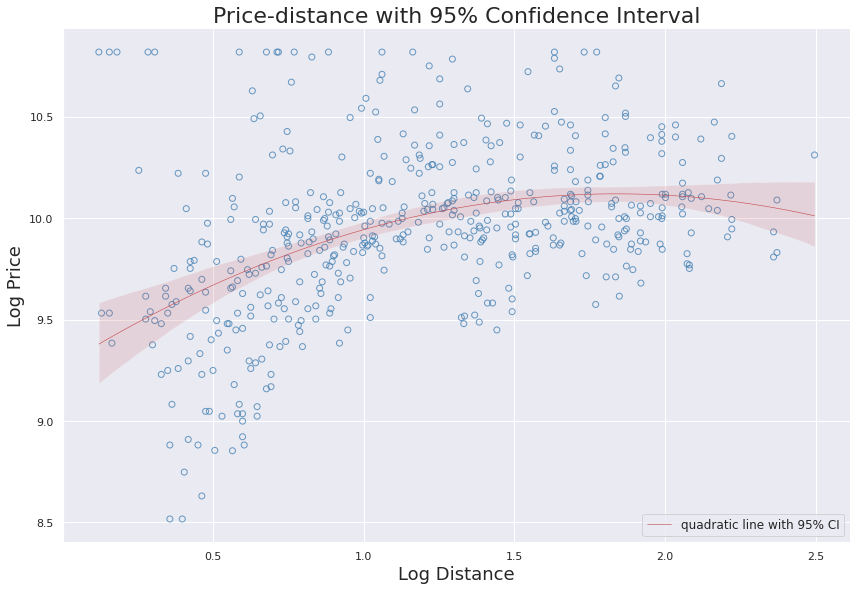

In [ ]:
ax=sns.lmplot(x="ldist", y="lprice", data=df2, order=2,
              height=8, aspect=1.5,
          scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
           line_kws={"color":'r', 'lw':'0.6', 'label':'quadratic line with 95% CI'})

plt.xlabel("Log Distance", fontsize=18)
plt.ylabel("Log Price", fontsize=18)
plt.title("Price-distance with 95% Confidence Interval", fontsize=22)
plt.legend(loc="lower right", fontsize=12)



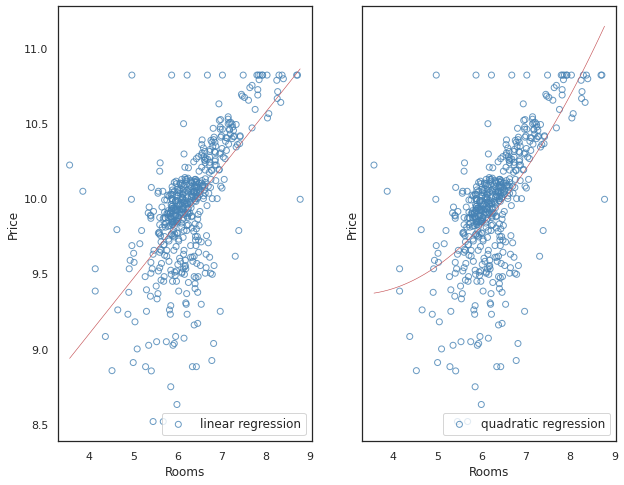

In [ ]:
dims=(10,8)

sns.set_style("white", {"xtick.major.size":20})
sns.set_context(font_scale=2)
fig, (ax1,ax2)=plt.subplots(ncols=2, sharey=True, figsize=dims)
sns.regplot(x="rooms", y="lprice", data=df2, order=1, ax=ax1, label="linear regression",
               ci=False,
            scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
            line_kws={"color":'r', 'lw':'0.6'})

ax1.set_xlabel("Rooms", fontsize=12)
ax1.set_ylabel("Price", fontsize=12)

sns.regplot(x="rooms", y="lprice", data=df2, order=2, ax=ax2,label="quadratic regression",
              ci=False,
          scatter_kws={'facecolors':'none', 'edgecolor':'steelblue'},
           line_kws={"color":'r', 'lw':'0.6'})

ax2.set_xlabel("Rooms", fontsize=12)
ax2.set_ylabel("Price", fontsize=12)

ax1.legend(loc="lower right", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.savefig("Quadratic regression for room on price.png")

In [ ]:
mreg=ols("price~nox+crime+rooms+dist+stratio", data=df2).fit()
print(mreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.61e-107
Time:                        02:28:32   Log-Likelihood:                -5080.8
No. Observations:                 506   AIC:                         1.017e+04
Df Residuals:                     500   BIC:                         1.020e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.087e+04   5054.599      4.129      0.0

In [ ]:
mreg2=ols("lprice~lnox+crime+rooms+ldist+stratio", data=df2).fit()
print(mreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.63e-113
Time:                        02:28:35   Log-Likelihood:                 4.8698
No. Observations:                 506   AIC:                             2.260
Df Residuals:                     500   BIC:                             27.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0052      0.290     38.014      0.0

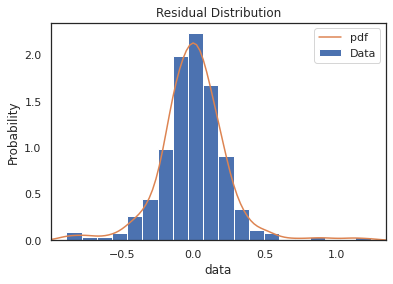

In [ ]:
import scipy.stats as st

resid=mreg2.resid
plt.hist(resid, density=True, bins=20, label="Data")
mn, mx=plt.xlim()
plt.xlim(mn, mx)
kde_xs=np.linspace(mn, mx, 100)
kde=st.gaussian_kde(resid)
plt.plot(kde_xs, kde.pdf(kde_xs), label="pdf")
plt.ylabel("Probability")
plt.xlabel("data")
plt.title("Residual Distribution")
plt.legend()

the quadratic term in the number of rooms

In [ ]:
mreg3=ols("lprice~lnox+ldist+rooms+np.square(rooms)+stratio", data=df2).fit()
print(mreg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           7.89e-98
Time:                        02:28:52   Log-Likelihood:                -31.806
No. Observations:                 506   AIC:                             75.61
Df Residuals:                     500   BIC:                             101.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.3855      0.566  

In [ ]:
H0='(rooms=0), (np.square(rooms)=0)'
f_test=mreg3.f_test(H0)
print(f_test)

<F test: F=array([[110.41876191]]), p=1.9193516500690422e-40, df_denom=500, df_num=2>


In [ ]:
mreg3.params

Intercept           13.385477
lnox                -0.901682
ldist               -0.086781
rooms               -0.545113
np.square(rooms)     0.062261
stratio             -0.047590
dtype: float64

# Example 3 - qualitative binary variable

Housing price Regression, Qualitative Binary Variable --- Colonial Style



---
  1. price:                    house price, $1000s
  
  2. assess:                   assessed value, $1000s
  3. bdrms:                    number of bedrooms
  4. lotsize:                  size of lot in square feet
  5. sqrft:                    size of house in square feet
  6. colonial:                 =1 if home is colonial style


In [ ]:
path="https://github.com/kwanto2023/RECO7093_data/blob/main/hprice1.dta?raw=true"
df3=pd.read_stata(path)
df3.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [ ]:
df3[['price', 'assess']].corr()

,price,assess
price,1.000000,0.905279
assess,0.905279,1.000000


In [ ]:
df3.corr()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
price,1.000000,0.905279,0.508084,0.347124,0.787907,0.137946,0.966501,0.873144,0.528780,0.750303
assess,0.905279,1.000000,0.482474,0.328146,0.865634,0.082936,0.868240,0.982962,0.571665,0.847185
bdrms,0.508084,0.482474,1.000000,0.136326,0.531474,0.304575,0.463490,0.458744,0.169490,0.519579
lotsize,0.347124,0.328146,0.136326,1.000000,0.183842,0.014019,0.324554,0.309907,0.807855,0.164870
sqrft,0.787907,0.865634,0.531474,0.183842,1.000000,0.065421,0.764000,0.866214,0.338607,0.985816
colonial,0.137946,0.082936,0.304575,0.014019,0.065421,1.000000,0.180516,0.109972,0.038642,0.106286
lprice,0.966501,0.868240,0.463490,0.324554,0.764000,0.180516,1.000000,0.875004,0.504142,0.743633
lassess,0.873144,0.982962,0.458744,0.309907,0.866214,0.109972,0.875004,1.000000,0.557735,0.864664
llotsize,0.528780,0.571665,0.169490,0.807855,0.338607,0.038642,0.504142,0.557735,1.000000,0.311299
lsqrft,0.750303,0.847185,0.519579,0.164870,0.985816,0.106286,0.743633,0.864664,0.311299,1.000000


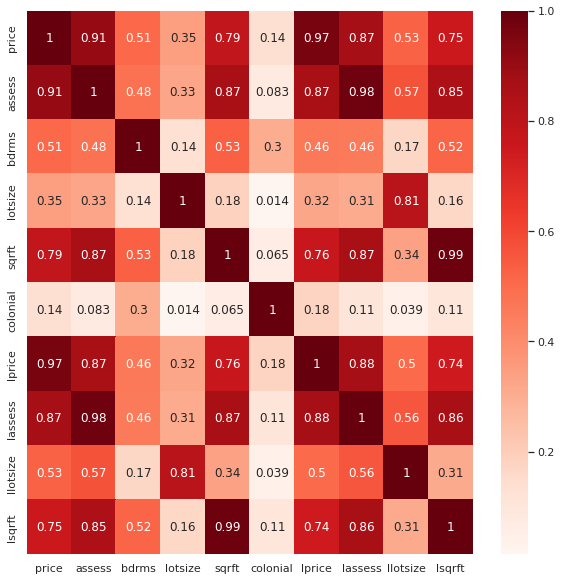

In [ ]:
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df3.corr(), annot=True, cmap=plt.cm.Reds)

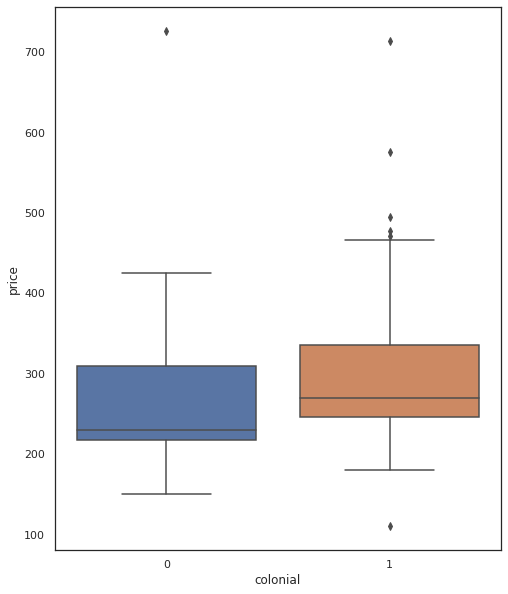

In [ ]:
plt.figure(figsize=(8,10))
ax=sns.boxplot(x="colonial", y="price", data=df3)

In [ ]:
df3['sqrft'].describe()

count      88.000000
mean     2013.693182
std       577.191583
min      1171.000000
25%      1660.500000
50%      1845.000000
75%      2227.000000
max      3880.000000
Name: sqrft, dtype: float64

In [ ]:
from statsmodels.formula.api import ols
sreg=ols("lprice~colonial", data=df3).fit()
print(sreg.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.897
Date:                Wed, 11 Jan 2023   Prob (F-statistic):             0.0924
Time:                        02:29:48   Log-Likelihood:                -17.998
No. Observations:                  88   AIC:                             40.00
Df Residuals:                      86   BIC:                             44.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5513      0.058     96.050      0.0

In [ ]:
mreg4=ols("lprice~ lsqrft + C(colonial) + llotsize", data=df3).fit()
print(mreg4.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     50.96
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           7.34e-19
Time:                        02:29:55   Log-Likelihood:                 26.159
No. Observations:                  88   AIC:                            -44.32
Df Residuals:                      84   BIC:                            -34.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5892      0.598  

In [ ]:
mreg5=ols("lprice~lsqrft + C(colonial)*llotsize", data=df3).fit()
print(mreg5.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     38.66
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.09e-18
Time:                        02:30:00   Log-Likelihood:                 26.825
No. Observations:                  88   AIC:                            -43.65
Df Residuals:                      83   BIC:                            -31.26
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
mreg5.params[1]

-0.6726275909137636

In [ ]:
yhat=mreg5.predict()
yhat.shape

(88,)

In [ ]:
X0=df3.loc[df3["colonial"]==0, ["lsqrft", "llotsize"]]
X1=df3.loc[df3["colonial"]==1, ["lsqrft", "llotsize"]]
X0.head()

,lsqrft,llotsize
2,7.225482,8.556414
8,7.477038,8.699514
9,7.544332,7.969704
13,7.549083,8.773385
16,7.600903,8.686430


In [ ]:
X0['lsqrft']*mreg5.params['lsqrft']+X0['llotsize']*mreg5.params['llotsize']

2     6.372377
8     6.574886
9     6.533057
13    6.636994
16    6.664157
22    6.575364
23    6.542749
25    6.642757
26    6.654384
31    7.035538
35    6.480012
39    6.463948
43    6.257545
46    6.680354
47    7.161501
51    6.560542
59    6.771969
60    6.515712
68    6.962635
70    6.625822
72    7.314971
74    6.892190
75    6.445326
79    6.489236
84    6.549328
85    6.496907
86    6.288977
dtype: float32

In [ ]:
X0['llotsize'].mean()

8.873684

In [ ]:
pred0=mreg5.params[0]+X0['lsqrft']*mreg5.params['lsqrft']+X0['llotsize'].mean()*mreg5.params['llotsize']
pred1=mreg5.params[0]+X1['lsqrft']*mreg5.params['lsqrft']+X1['llotsize'].mean()*mreg5.params['llotsize']

pred=mreg5.params[0]+X0['lsqrft']*mreg5.params['lsqrft']+X0['llotsize'].mean()*mreg5.params['llotsize']
pred1

0     5.753209
1     5.635242
3     5.370839
4     5.775737
5     5.842656
        ...   
80    5.413661
81    5.600493
82    5.640174
83    5.545476
87    5.519865
Name: lsqrft, Length: 61, dtype: float32

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


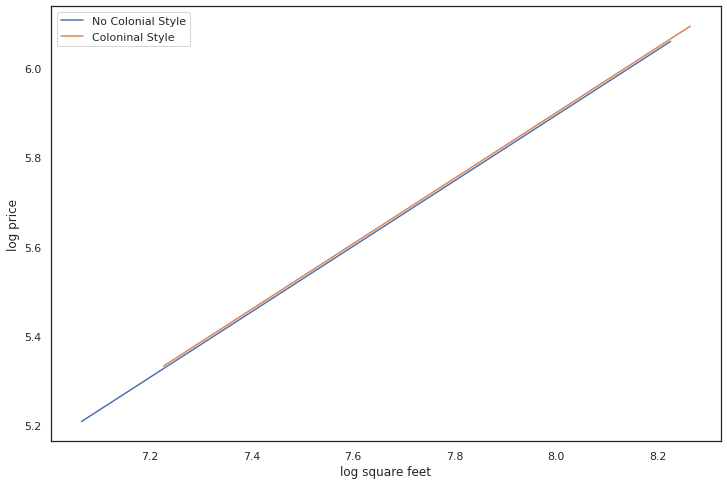

In [ ]:
plt.figure(figsize=(12,8))
#plt.plot(df3['lsqrft'], df3['lprice'], "o", mfc='none')
sns.lineplot(X0['lsqrft'], pred0, label="No Colonial Style")
sns.lineplot(X1['lsqrft'], pred1, label="Coloninal Style")
plt.ylabel("log price")
plt.xlabel('log square feet')
plt.legend()

# Example 4 - Time Series

The weekly returns in NYSE.DTA are computed using data from January 1976 through March 1989

In [ ]:
path="https://github.com/kwanto2023/RECO7093_data/blob/main/NYSE.dta?raw=true"
stock=pd.read_stata(path)
stock.head()
stock.describe()
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 690
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     691 non-null    float32
 1   return    690 non-null    float32
 2   return_1  689 non-null    float32
 3   t         691 non-null    int16  
 4   price_1   690 non-null    float32
 5   price_2   689 non-null    float32
 6   cprice    690 non-null    float32
 7   cprice_1  689 non-null    float32
dtypes: float32(7), int16(1)
memory usage: 25.6 KB


Text(0, 0.5, 'Price')

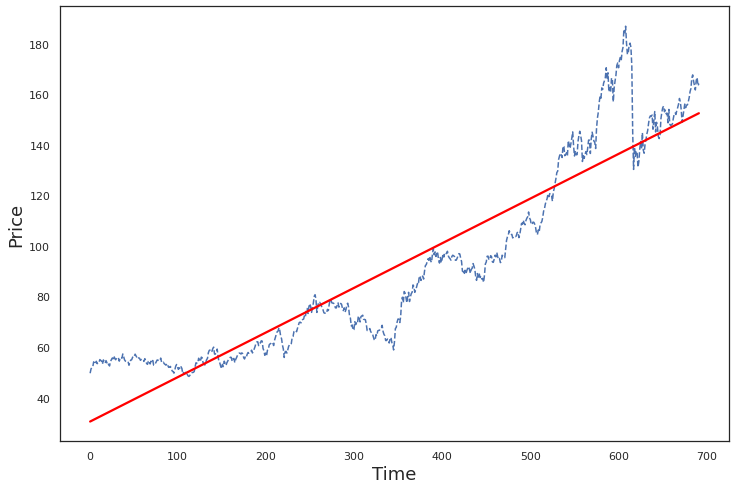

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(stock['t'], stock['price'], "b--", )
sns.regplot(x='t', y='price', data=stock, ci=False, scatter=False, color='red')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)

In [ ]:
stock.dropna(inplace=True)
#stock.info()
y=stock['return']
x=stock['return_1']
x=sm.add_constant(x)
result=sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.399
Date:                Wed, 11 Jan 2023   Prob (F-statistic):              0.122
Time:                        02:33:04   Log-Likelihood:                -1491.2
No. Observations:                 689   AIC:                             2986.
Df Residuals:                     687   BIC:                             2996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1796      0.081      2.225      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
yhat=result.predict()
resid=result.resid

# Example 5 Housing Price and Housing Investment

Annual observations on housing investment and a housing price index in the United States for 1947 through 1988
---
  1. year:                     1947-1988
  2. inv:                      real housing invest., millions $
  3. pop:                      population, 1000s
  4. price:                   housing price index; 1982 = 1
  5. linv:                     log(inv)
  6. lpop:                     log(pop)
  7. lprice:                   log(price)
  8. t:                        time trend: t=1,...,42
  9. invpc:                    per capita invest., inv/pop




In [ ]:
path="https://github.com/kwanto2023/RECO7093_data/blob/main/hseinv.dta?raw=true"
df5=pd.read_stata(path)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      42 non-null     int16  
 1   inv       42 non-null     float32
 2   pop       42 non-null     float32
 3   price     42 non-null     float32
 4   linv      42 non-null     float32
 5   lpop      42 non-null     float32
 6   lprice    42 non-null     float32
 7   t         42 non-null     int8   
 8   invpc     42 non-null     float32
 9   linvpc    42 non-null     float32
 10  lprice_1  41 non-null     float32
 11  linvpc_1  41 non-null     float32
 12  gprice    41 non-null     float32
 13  ginvpc    41 non-null     float32
dtypes: float32(12), int16(1), int8(1)
memory usage: 2.4 KB


In [ ]:
result=ols('linvpc~lprice', data=df5).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 linvpc   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     10.53
Date:                Wed, 11 Jan 2023   Prob (F-statistic):            0.00238
Time:                        02:34:00   Log-Likelihood:                 19.617
No. Observations:                  42   AIC:                            -35.23
Df Residuals:                      40   BIC:                            -31.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5502      0.043    -12.788      0.0

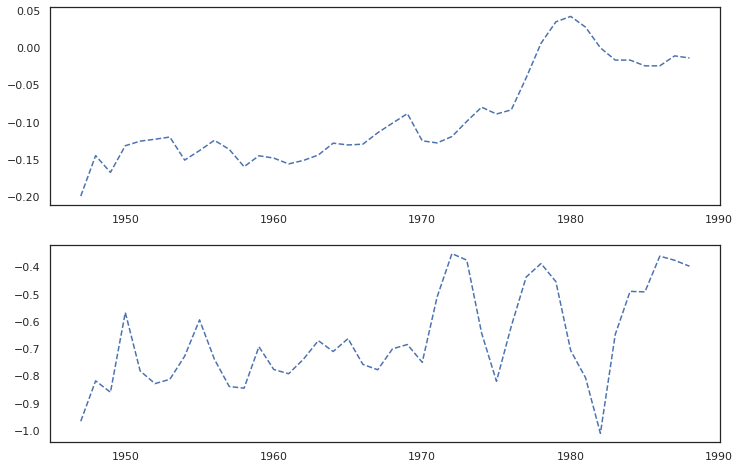

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(df5['year'], df5['lprice'], 'b--')
plt.subplot(2,1,2)
plt.plot(df5['year'], df5['linvpc'], 'b--')